### 머신러닝(7.1 LDA/QDA) 의 확률밀도값 알아내기

In [18]:
#정규분포를 따를때 모수값 M와 sigma만 알면 확률밀도함수를 알아낼 수 있다
import scipy as sp

#체온이 정상일때 
rv_normal = sp.stats.norm(loc=37.5, scale=0.1)

In [20]:
#정상일때 체온이 37.5도일 확률
rv_normal.pdf(37.5)

3.989422804014327

In [22]:
# 감기에 걸렸을때
rv_flu = sp.stats.norm(loc=40, scale=0.2)

# 감기에 걸린 사람의 체온이 39.9도일 확률
rv_flu.pdf(39.9)

1.7603266338214911

In [23]:
rv_normal.pdf(38.34), rv_flu.pdf(38.34)

(1.9010815379074236e-15, 2.1908197177549902e-15)

In [24]:
# 38.34도면 이제 헷갈린다. 정상인지 감기환자인지

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


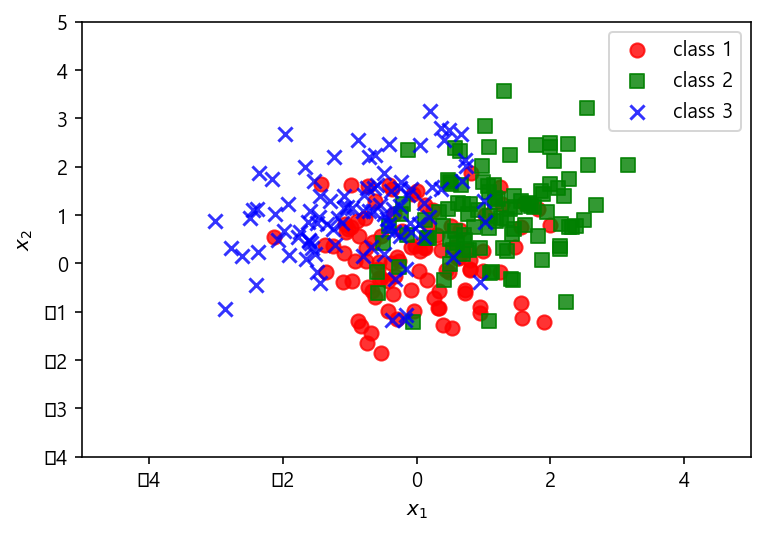

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [4]:
X1.mean(axis=0)

array([-0.00080125,  0.1194572 ])

In [7]:
X2.mean(axis=0)

array([1.16303727, 1.03930605])

In [6]:
X3.mean(axis=0)

array([-0.8640604 ,  1.02295794])

In [5]:
np.cov(X1.T)

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [9]:
np.cov(X2.T)

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [8]:
np.cov(X3.T)

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

#사전확률
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [25]:
### 각 클래스에서 [2,-1]이 나올 확률

In [16]:
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))
rv1.pdf([2,-1]),rv2.pdf([2,-1]),rv3.pdf([2,-1]),

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

## 문제
이차판별분석법을 사용하여 붓꽃 분류문제를 풀고 성능을 분류결과표와 분류보고서를 출력하라. 그리고 각 클래스에 대한 ROC 커브를 그려라.

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

In [41]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [84]:
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target

model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)


y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



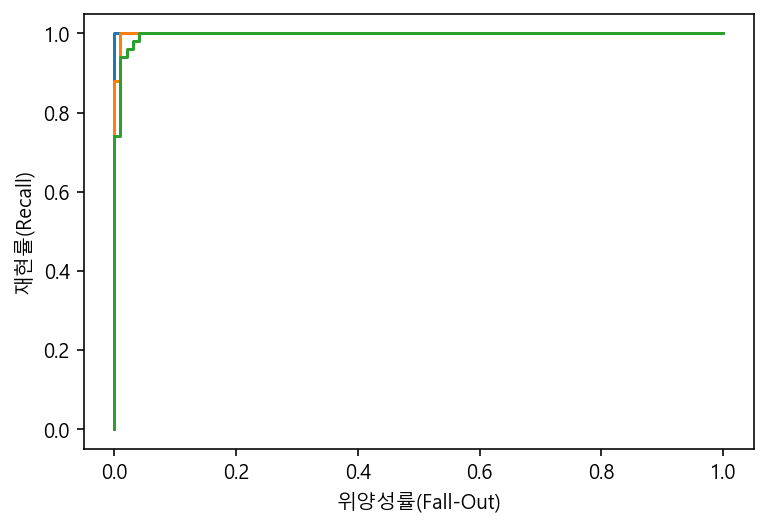

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])
# label_binarize: 원핫인코딩을 해줌


fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

In [28]:
[1,2,3]*2

[1, 2, 3, 1, 2, 3]

In [29]:
[None]*3

[None, None, None]

연습 문제 1
붓꽃 분류문제를 가우시안 나이브베이즈 모형을 사용하여 풀어보자.

(1) 각각의 종이 선택될 사전확률을 구하라.

(2) 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하라.

(3) 학습용 데이터를 사용하여 분류문제를 풀고 다음을 계산하라.

분류결과표
분류보고서
ROC커브
AUC

In [60]:
from sklearn.naive_bayes import GaussianNB
iris = load_iris()
X = iris.data
y = iris.target
model_norm = GaussianNB().fit(X, y)

In [62]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [63]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [64]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [65]:
model_norm.theta_[2], model_norm.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [78]:
y_pred=model_norm.predict(X)

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred, target_names=['class0','class1','class2']))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        50
      class1       0.94      0.94      0.94        50
      class2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [125]:
from sklearn.datasets import load_digits
digits = load_digits()

In [126]:
X = digits.data

In [100]:
X.shape

(1797, 64)

In [101]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [102]:
digits.images[0,:,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [105]:
from sklearn.preprocessing import Binarizer
X2 = Binarizer(7).fit_transform(X)

In [114]:
X2[0,:]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

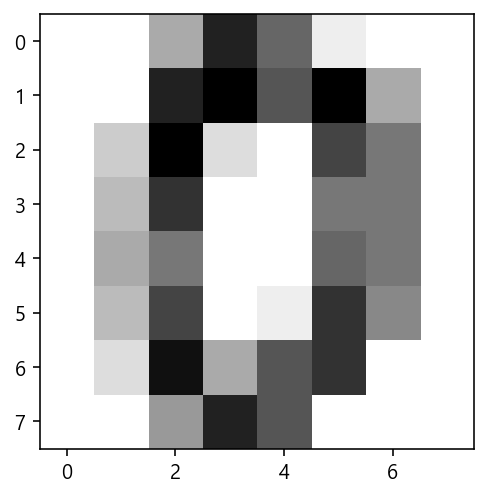

In [112]:
plt.imshow(digits.images[0,:,:], cmap=plt.cm.binary)
plt.axis="off"

MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교하라.

In [143]:
#다항분포 나이브 베이즈
from sklearn.datasets import load_digits
from sklearn.preprocessing import Binarizer

digits = load_digits()

X = digits.data

y = Binarizer(7).fit_transform(X)


In [145]:

from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X[0,:], y[0,:])
# y_pred=model_norm.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred, target_names=['class0','class1','class2']))